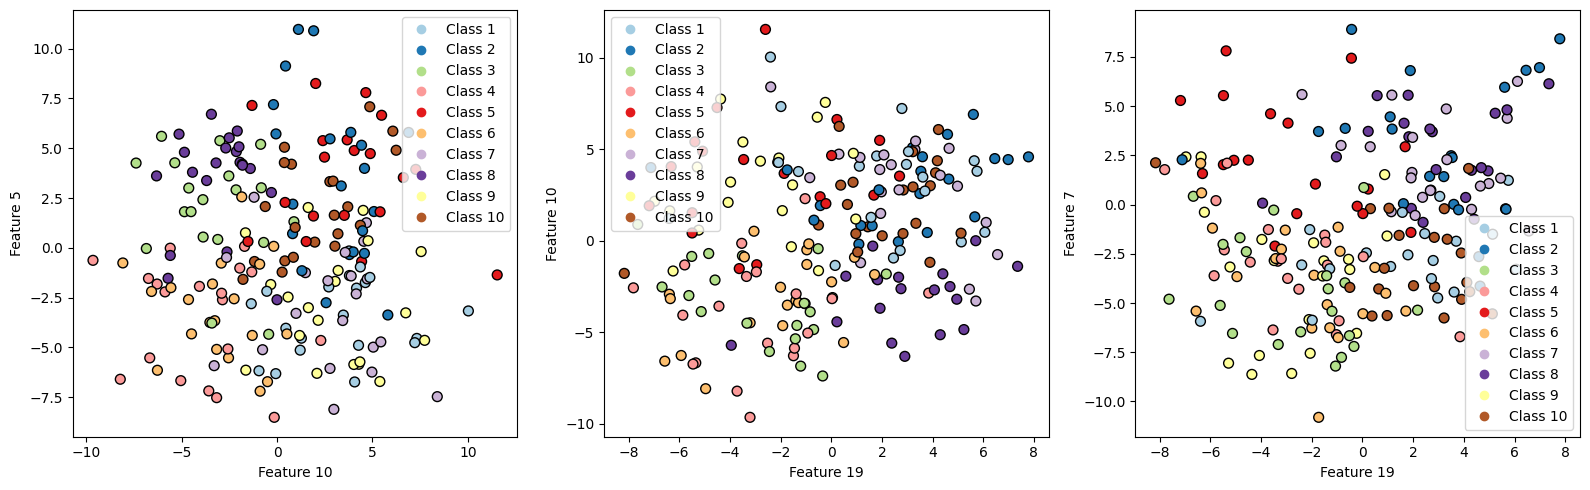

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
import random

# Generate a synthetic dataset with added noise
def generate_noisy_dataset(n_samples=100, n_features=2, n_classes=2, noise_level=0.1, random_state=42):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_features,
                               n_redundant=0, n_clusters_per_class=1, n_classes=n_classes,
                               class_sep=3, random_state=random_state)

    rng = np.random.default_rng(random_state)
    noise = rng.normal(loc=0.0, scale=noise_level, size=X.shape)
    X_noisy = X + noise

    return X_noisy, y

X_noisy, y = generate_noisy_dataset(n_samples=200, n_features=20, n_classes=10, noise_level=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.4, random_state=42)

plt.figure(figsize=(16,5))
for j in range(3):
    random_num1 = random.randint(0, 19)
    while True:
        random_num2 = random.randint(0, 19)
        if random_num2 != random_num1:
            break
    plt.subplot(1,3,j+1)
    scatter = plt.scatter(X_noisy[:, random_num1], X_noisy[:, random_num2], c=y, cmap=plt.cm.Paired, s=50, edgecolors='k')
    plt.xlabel(f"Feature {random_num1}")
    plt.ylabel(f"Feature {random_num2}")

    classes = [f'Class {i}' for i in range(1, 21)]
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.tight_layout()
plt.show()

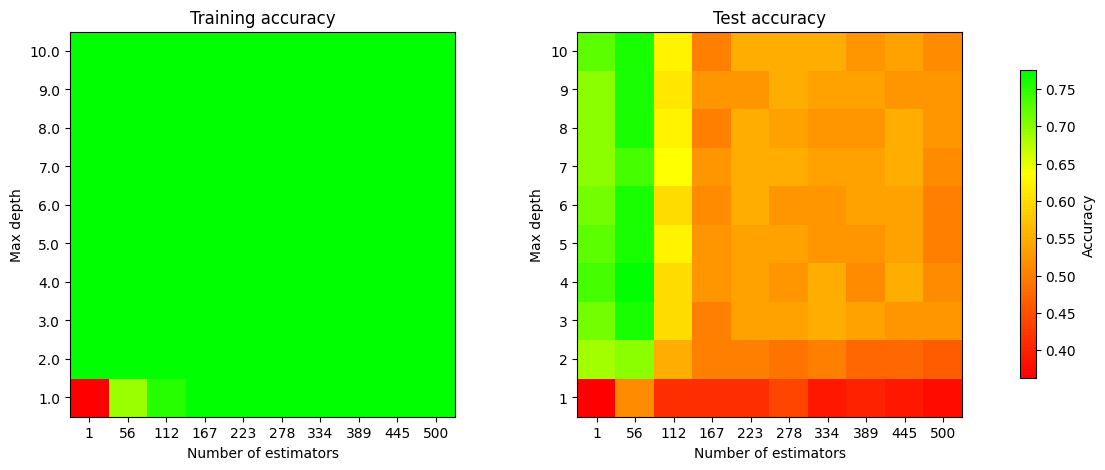

In [152]:
# Evaluate 
num_values = 10
train_scores = np.zeros((num_values,num_values))
test_scores = np.zeros((num_values,num_values))
estimator_range = np.linspace(1, 500, num_values)
depth_range = np.linspace(1, 10, num_values)
for i, est in enumerate(estimator_range):
    for j, dep in enumerate(depth_range): 
        model = GradientBoostingClassifier(n_estimators=int(est), max_depth=int(dep))
        model.fit(X_train, y_train)

        train_score = accuracy_score(y_train, model.predict(X_train))
        train_scores[i][j] = train_score 

        test_score = accuracy_score(y_test, model.predict(X_test))
        test_scores[i][j] = test_score

colors = colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0, 1, 0)]   # Red (low) to green (high)
n_bins = 100  # Number of bins/colors in the colormap
cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
ax1, ax2 = axes 

# Plot for Training accuracy
im1 = ax1.imshow(train_scores, cmap=custom_cmap, interpolation='nearest', origin='lower')
ax1.set_title('Training accuracy')
ax1.set_xticks(np.arange(0, num_values))
ax1.set_xticklabels(np.around(estimator_range).astype(int))
ax1.set_yticks(np.arange(0, num_values).astype(int))
ax1.set_yticklabels(np.round(depth_range))
ax1.set_xlabel('Number of estimators')
ax1.set_ylabel('Max depth')

# Plot for Test accuracy
im2 = ax2.imshow(test_scores, cmap=custom_cmap, interpolation='nearest', origin='lower')
ax2.set_title('Test accuracy')
ax2.set_xticks(np.arange(0, num_values))
ax2.set_xticklabels(np.around(estimator_range).astype(int))
ax2.set_yticks(np.arange(0, num_values))
ax2.set_yticklabels(np.around(depth_range).astype(int))
ax2.set_xlabel('Number of estimators')
ax2.set_ylabel('Max depth')

cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label('Accuracy') 

plt.show()

